# Предварительная обработка

В нашем исходном датафрейме фигурирует:

***4 количественных признака:***
- количество лайков,
- количество комментариев,
- количество просмотров,
- количество репостов

Также в столбцах содержится информация о дате и тексте, содержащемся в посте.

Подгружаем библиотеки

In [38]:
import pandas as pd
import math
import re
import warnings
warnings.filterwarnings('ignore')

In [39]:
data = pd.read_csv('Dataframe_Girlzzz.csv')
print(data)

      Unnamed: 0        date  likes  reposts  views  comments  \
0          50730  1712901117     31       25   3995         0   
1          50726  1712859391     24       21   6592         3   
2          50725  1712846238      8        4   6314         0   
3          50721  1712840095     29       28   7411         3   
4          50720  1712819033     23       19   4581         0   
...          ...         ...    ...      ...    ...       ...   
1495       46511  1676599680     30       31  11002         0   
1496       46510  1676590680     28       36   8779         0   
1497       46506  1676580634     35       35  10657         2   
1498       46503  1676562054     20       22  12509         0   
1499       46502  1676538523     43       20  10823         2   

                                                   text  
0     Платья с открытой спинкой в винтажном стиле ♥ ...  
1     Комплекты из хлопкового муслина с поясом ♥ \n ...  
2     Фотографии наших прекрасных клиенток в 

Посмотрим на имеющиееся пропуски в датафрейме

In [40]:
data[data.isnull().any(axis=1)]

,Unnamed: 0,date,likes,reposts,views,comments,text
452,49547,1699022987,90,63,17182,4,NaN
591,49126,1695276432,41,3,4846,1,NaN


Мы видим, что в наших данных есть две пустых строки с отсутствующим текстом. В дальнейшем мы не сможем проанализировать эти 2 строки, поскольку непонятно, какая информация содержалась в посте (возможно, реклама). Мы не можем заменить данные медианой или среднем, поскольку NaN в нашем датафрейме не являются количесвенными, поэтому удалим эти строки.

In [41]:
df=data.dropna()
df

,Unnamed: 0,date,likes,reposts,views,comments,text
0,50730,1712901117,31,25,3995,0,Платья с открытой спинкой в винтажном стиле ♥ ...
1,50726,1712859391,24,21,6592,3,Комплекты из хлопкового муслина с поясом ♥ \n ...
2,50725,1712846238,8,4,6314,0,Фотографии наших прекрасных клиенток в вещах о...
3,50721,1712840095,29,28,7411,3,Хлопковые платья на запах с объёмными рукавами...
4,50720,1712819033,23,19,4581,0,Трикотажные платья-макси с открытой спинкой 🤍\...
...,...,...,...,...,...,...,...
1495,46511,1676599680,30,31,11002,0,Платье-свитер в полосочку на молнии 🌸\n\n2390₽
1496,46510,1676590680,28,36,8779,0,Тройной купальник с высокой посадкой 🌴\n\n1690₽
1497,46506,1676580634,35,35,10657,2,Комплект с юбкой и джемпером ❤️\n\n3290₽
1498,46503,1676562054,20,22,12509,0,Боди с ассиметричным вырезом 💫\n\n1550₽


# Разбиение исходных данных на цену и товар

Разобьем данные в столбец "text" на наименование товара и его цену. Cохраним полученные значения в столбцы "name" (наименоване товара) и "price"(цена товара)

In [42]:
df['name'] = ''
df['price'] = ''
for index, row in df.iterrows():
    a = str(row['text']).split('\n\n')
    if len(a) == 2:
        df.at[index, 'name'] = a[0]
        df.at[index, 'price'] = a[1]
    else:
        df.at[index, 'name'] = a[0]
        df.at[index, 'price'] = 'None'

df = df[df['price'] != 'None']
df

,Unnamed: 0,date,likes,reposts,views,comments,text,name,price
3,50721,1712840095,29,28,7411,3,Хлопковые платья на запах с объёмными рукавами...,Хлопковые платья на запах с объёмными рукавами ♥️,2590₽
4,50720,1712819033,23,19,4581,0,Трикотажные платья-макси с открытой спинкой 🤍\...,Трикотажные платья-макси с открытой спинкой 🤍,2690₽
12,50707,1712658663,40,35,9721,0,Хлопковые костюмы с жилетом 💔\n\n2690₽,Хлопковые костюмы с жилетом 💔,2690₽
13,50705,1712650610,37,21,6313,0,Идеальное пляжное платье с открытой спинкой ✨\...,Идеальное пляжное платье с открытой спинкой ✨,2550₽
14,50702,1712642541,35,22,10655,0,Трикотажные платья-бандо по фигуре 🤍\n\n2550₽,Трикотажные платья-бандо по фигуре 🤍,2550₽
...,...,...,...,...,...,...,...,...,...
1495,46511,1676599680,30,31,11002,0,Платье-свитер в полосочку на молнии 🌸\n\n2390₽,Платье-свитер в полосочку на молнии 🌸,2390₽
1496,46510,1676590680,28,36,8779,0,Тройной купальник с высокой посадкой 🌴\n\n1690₽,Тройной купальник с высокой посадкой 🌴,1690₽
1497,46506,1676580634,35,35,10657,2,Комплект с юбкой и джемпером ❤️\n\n3290₽,Комплект с юбкой и джемпером ❤️,3290₽
1498,46503,1676562054,20,22,12509,0,Боди с ассиметричным вырезом 💫\n\n1550₽,Боди с ассиметричным вырезом 💫,1550₽


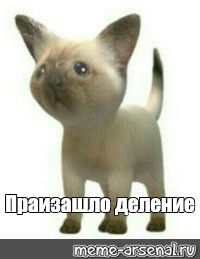

# Фильтрация данных

Создаем функцию, которая будет очищать данные в столбце 'text': удалять из текста все символы не являющиеся цифрами или буквами

In [43]:
def deEmojify(text):
    """
    Удаляет из текста все символы не являющиеся цифрами или буквами.

    Parameters
    ----------
    text : str
        Текст, который мы желаем изменить

    Returns
    -------
    str
        Исправленный текст без эмоджи и лишних символов, которых нет на клавиатуре
    """
    regrex_pattern = re.compile(pattern = "["
                                u"\U00000000-\U00000009"
                                u"\U0000000B-\U0000001F"
                                u"\U00000080-\U00000400"
                                u"\U00000402-\U0000040F"
                                u"\U00000450-\U00000450"
                                u"\U00000452-\U0010FFFF"
                                "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

Применяем функкцию deEmojify к нашим целевым столбцам: "name" и "price"

In [44]:
df['name'] = df['name'].apply(deEmojify)
df['price'] = df['price'].apply(deEmojify)

Удалим столбец "text", так как всю необходимую информацию мы из него уже извлекли

In [45]:
df = df.drop(columns=['text'])
df

,Unnamed: 0,date,likes,reposts,views,comments,name,price
3,50721,1712840095,29,28,7411,3,Хлопковые платья на запах с объёмными рукавами,2590
4,50720,1712819033,23,19,4581,0,Трикотажные платья-макси с открытой спинкой,2690
12,50707,1712658663,40,35,9721,0,Хлопковые костюмы с жилетом,2690
13,50705,1712650610,37,21,6313,0,Идеальное пляжное платье с открытой спинкой,2550
14,50702,1712642541,35,22,10655,0,Трикотажные платья-бандо по фигуре,2550
...,...,...,...,...,...,...,...,...
1495,46511,1676599680,30,31,11002,0,Платье-свитер в полосочку на молнии,2390
1496,46510,1676590680,28,36,8779,0,Тройной купальник с высокой посадкой,1690
1497,46506,1676580634,35,35,10657,2,Комплект с юбкой и джемпером,3290
1498,46503,1676562054,20,22,12509,0,Боди с ассиметричным вырезом,1550


Предварительная обработка окончена!

In [47]:
df.to_csv('STEP3')

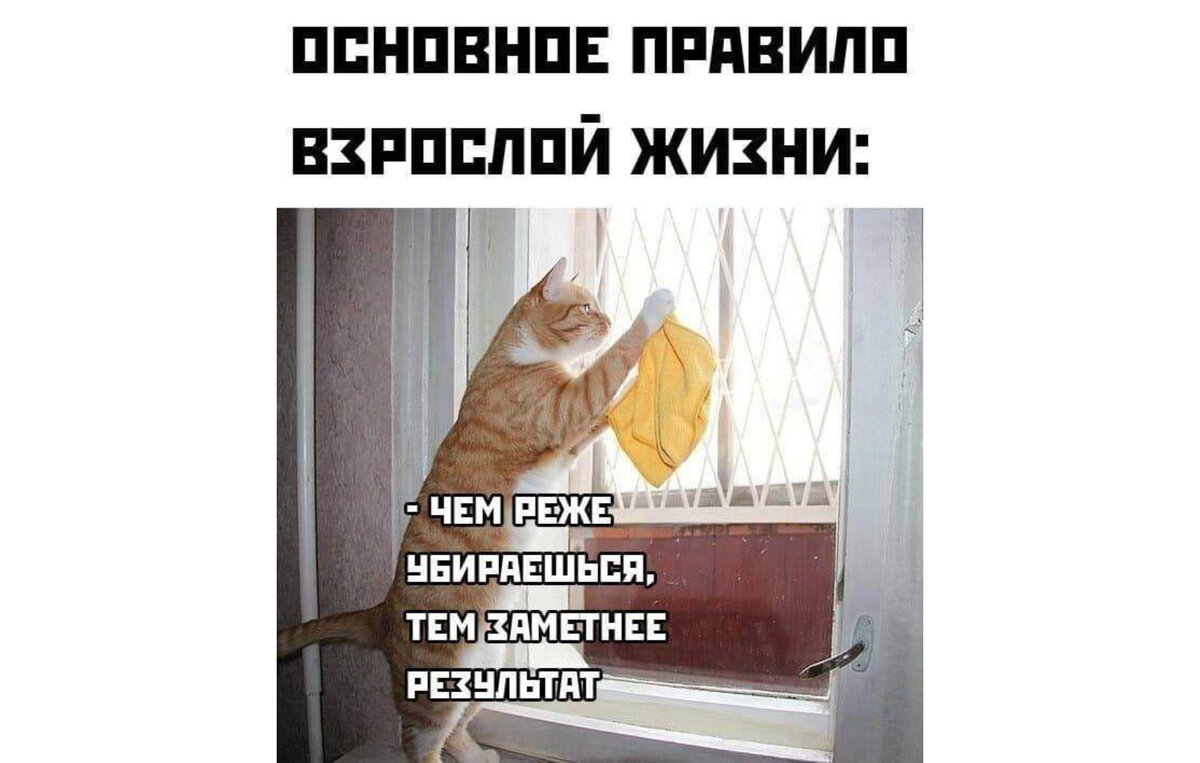